In [1]:
%matplotlib inline


# Interactive functions

This provides examples of uses of interactive functions, such as ginput,
waitforbuttonpress and manual clabel placement.

This script must be run interactively using a backend that has a
graphical user interface (for example, using GTK3Agg backend, but not
PS backend).


In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt


def tellme(s):
    print(s)
    plt.title(s, fontsize=16)
    plt.draw()

Define a triangle by clicking three points



You will define a triangle, click to begin


C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_16764/4099256730.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.waitforbuttonpress()


KeyboardInterrupt: 

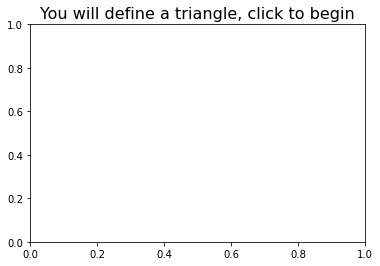

In [3]:
plt.figure()
plt.xlim(0, 1)
plt.ylim(0, 1)

tellme('You will define a triangle, click to begin')

plt.waitforbuttonpress()

while True:
    pts = []
    while len(pts) < 3:
        tellme('Select 3 corners with mouse')
        pts = np.asarray(plt.ginput(3, timeout=-1))
        if len(pts) < 3:
            tellme('Too few points, starting over')
            time.sleep(1)  # Wait a second

    ph = plt.fill(pts[:, 0], pts[:, 1], 'r', lw=2)

    tellme('Happy? Key click for yes, mouse click for no')

    if plt.waitforbuttonpress():
        break

    # Get rid of fill
    for p in ph:
        p.remove()

Now contour according to distance from triangle
corners - just an example



In [ ]:
# Define a nice function of distance from individual pts
def f(x, y, pts):
    z = np.zeros_like(x)
    for p in pts:
        z = z + 1/(np.sqrt((x - p[0])**2 + (y - p[1])**2))
    return 1/z


X, Y = np.meshgrid(np.linspace(-1, 1, 51), np.linspace(-1, 1, 51))
Z = f(X, Y, pts)

CS = plt.contour(X, Y, Z, 20)

tellme('Use mouse to select contour label locations, middle button to finish')
CL = plt.clabel(CS, manual=True)

Now do a zoom



In [ ]:
tellme('Now do a nested zoom, click to begin')
plt.waitforbuttonpress()

while True:
    tellme('Select two corners of zoom, middle mouse button to finish')
    pts = plt.ginput(2, timeout=-1)
    if len(pts) < 2:
        break
    (x0, y0), (x1, y1) = pts
    xmin, xmax = sorted([x0, x1])
    ymin, ymax = sorted([y0, y1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

tellme('All Done!')
plt.show()